In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [57]:
data1 = pd.read_csv('/content/Dataset1.csv')
data1

,Company,TypeName,Ram,Weight,Price,Touchscreen,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1297,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,157.350512,Intel Core i7,0,128,Intel,Windows
1298,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,276.053530,Intel Core i7,0,512,Intel,Windows
1299,Lenovo,Notebook,2,1.50,12201.1200,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1300,HP,Notebook,6,2.19,40705.9200,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [58]:
# from sklearn.preprocessing import LabelEncoder
# columns_to_encode = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
# label_encoder = LabelEncoder()
# for column in columns_to_encode:
#     data1[column] = label_encoder.fit_transform(data1[column])

In [59]:
columns_to_encode = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']
df_encoded = pd.get_dummies(data1, columns=columns_to_encode)
df_encoded

,Ram,Weight,Price,Touchscreen,ppi,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,...,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia,os_Mac,os_Others/No OS/Linux,os_Windows
0,8,1.37,71378.6832,0,226.983005,0,128,0,1,0,...,0,1,0,0,0,1,0,1,0,0
1,8,1.34,47895.5232,0,127.677940,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,8,1.86,30636.0000,0,141.211998,0,256,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,16,1.83,135195.3360,0,220.534624,0,512,0,1,0,...,0,0,1,0,1,0,0,1,0,0
4,8,1.37,96095.8080,0,226.983005,0,256,0,1,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,4,1.80,33992.6400,1,157.350512,0,128,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1298,16,1.30,79866.7200,1,276.053530,0,512,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1299,2,1.50,12201.1200,0,111.935204,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
1300,6,2.19,40705.9200,0,100.454670,1000,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


In [60]:
x1 = df_encoded.drop(columns=['Price'])
y1 = np.log(df_encoded['Price'])

In [61]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.20,random_state=42)

In [62]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x1_train = scaler.fit_transform(x1_train)
# x1_test = scaler.transform(x1_test)

# Linear Regression

In [63]:
step1 = LinearRegression()

pipe = Pipeline([
    ('step1',step1)])

pipe.fit(x1_train, y1_train)

y1_pred = pipe.predict(x1_test)

ds1lr_normal_mae = mean_absolute_error(y1_test, y1_pred)
ds1lr_normal = r2_score(y1_test, y1_pred)
ds1lr_normal_mse = mean_squared_error(y1_test, y1_pred)
ds1lr_normal_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred))
print('MAE:', ds1lr_normal_mae)
print('RMSE:', ds1lr_normal_rmse)
print('MSE:', ds1lr_normal_mse)
print('R2 Score:', ds1lr_normal)

MAE: 0.21349294918948028
RMSE: 0.2702170025750648
MSE: 0.07301722848065259
R2 Score: 0.8104894153780459


# KNN
Hyperparameter Tuning of KNN

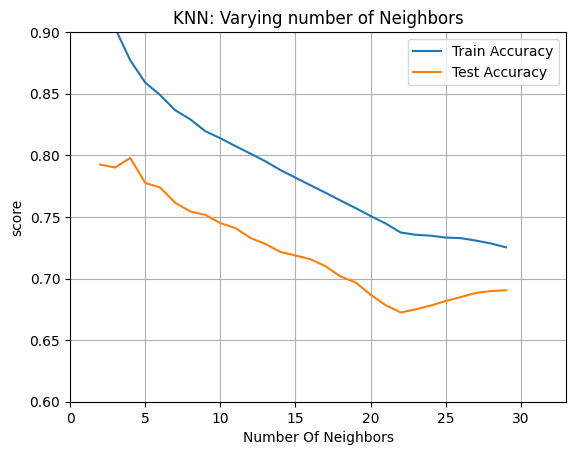

In [153]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsRegressor(n_neighbors=neighbor)
    knn.fit(x1_train, y1_train)
    train_score[neighbor]=knn.score(x1_train, y1_train)
    test_score[neighbor]=knn.score(x1_test, y1_test)

plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("score")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

In [65]:
step1 = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([
    ('step1',step1)])

pipe.fit(x1_train, y1_train)
y1_pred_knn = pipe.predict(x1_test)

ds1knn_mae = mean_absolute_error(y1_test, y1_pred_knn)
ds1knn_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_knn))
ds1knn_mse = mean_squared_error(y1_test, y1_pred_knn)
ds1knn_r2 = r2_score(y1_test, y1_pred_knn)

print('KNN Results:')
print('MAE:', ds1knn_mae)
print('RMSE:', ds1knn_rmse)
print('MSE:', ds1knn_mse)
print('R2 Score:', ds1knn_r2)

KNN Results:
MAE: 0.22087766983817098
RMSE: 0.29273829658100214
MSE: 0.08569571028514676
R2 Score: 0.7775833937598036


# Decision Tree

In [66]:
step1 = DecisionTreeRegressor(random_state=42)

pipe = Pipeline([
    ('step1',step1)
])
pipe.fit(x1_train, y1_train)
y1_pred_dt = pipe.predict(x1_test)

ds1dt_mae = mean_absolute_error(y1_test, y1_pred_dt)
ds1dt_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_dt))
ds1dt_mse = mean_squared_error(y1_test, y1_pred_dt)
ds1dt_r2 = r2_score(y1_test, y1_pred_dt)

print('Decision Tree Results:')
print('MAE:', ds1dt_mae)
print('RMSE:', ds1dt_rmse)
print('MSE:', ds1dt_mse)
print('R2 Score:', ds1dt_r2)

Decision Tree Results:
MAE: 0.1792031099173923
RMSE: 0.23855615889402235
MSE: 0.05690904094627004
R2 Score: 0.8522969736812178


# SVM
HyperParameter Tuning

In [68]:
gsc = GridSearchCV(
    estimator=SVR(kernel='rbf'),
    param_grid={
        'C': [0.1, 1, 100, 1000],
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},cv=5, scoring='r2', verbose=0, n_jobs=-1)
gsc = gsc.fit(x1_train, y1_train)

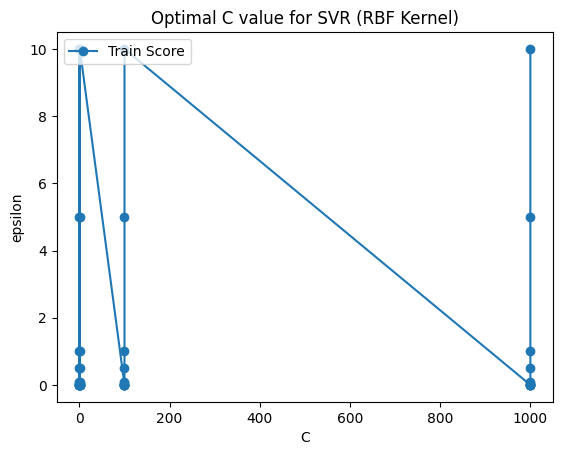

In [69]:
results = pd.DataFrame(gsc.cv_results_)
plt.plot(results["param_C"], results["param_epsilon"], label='Train Score',marker='o')
plt.xlabel('C')
plt.ylabel('epsilon')
plt.title("Optimal C value for SVR (RBF Kernel)")
plt.legend(loc='upper left')
plt.show()

In [70]:
gsc.best_params_

{'C': 1000, 'epsilon': 0.1}

In [71]:
step1 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1)
])

pipe.fit(x1_train, y1_train)
y1_pred_svm = pipe.predict(x1_test)

ds1svm_mae = mean_absolute_error(y1_test, y1_pred_svm)
ds1svm_rmse = np.sqrt(mean_squared_error(y1_test, y1_pred_svm))
ds1svm_mse = mean_squared_error(y1_test, y1_pred_svm)
ds1svm_r2 = r2_score(y1_test, y1_pred_svm)

print('\nSVM Results:')
print('MAE:', ds1svm_mae)
print('RMSE:', ds1svm_rmse)
print('MSE:', ds1svm_mse)
print('R2 Score:', ds1svm_r2)


SVM Results:
MAE: 0.19582497084951342
RMSE: 0.2605996653357293
MSE: 0.06791218557309411
R2 Score: 0.823739160487009


# Model Evaluation - Partitioning

# LR

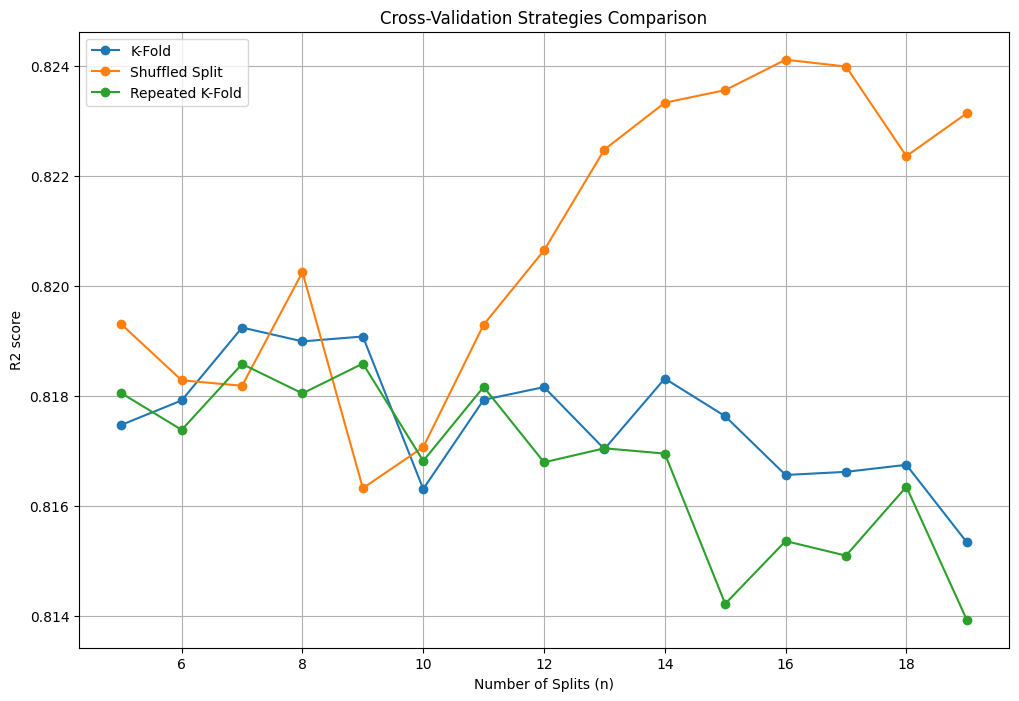

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, RepeatedKFold
import matplotlib.pyplot as plt

clf = LinearRegression()
n_splits_values = np.arange(5, 20)
accuracy_repeated = []
accuracy_kfold = []
accuracy_shuffled = []

for n_splits in n_splits_values:
    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x1, y1, cv=kfold_cv, scoring='r2')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(clf, x1, y1, cv=shuffled_cv, scoring='r2')
    accuracy_shuffled.append(np.mean(scores))

    repeated_cv = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=42)
    scores = cross_val_score(clf, x1, y1, cv=repeated_cv, scoring='r2')
    accuracy_repeated.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')
plt.plot(n_splits_values, accuracy_repeated, label='Repeated K-Fold', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()

In [73]:
mean_mae_scores1 = []
mean_mse_scores1 = []
mean_rmse_scores1 = []
mean_r2score1 = []

In [74]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

kf = KFold(n_splits=5,shuffle=True,random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2score = []

for train_index, test_index in kf.split(x1):
    X_train, X_test = x1.iloc[train_index], x1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

    regressor = LinearRegression()
    # print(X_train.shape, y_train.shape)
    regressor.fit(X_train, y_train)

    y_test_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2score.append(r2)

# Calculate mean scores across all folds
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2score)

mean_mae_scores1.append(mean_mae)
mean_mse_scores1.append(mean_mse)
mean_rmse_scores1.append(mean_r2)
mean_r2score1.append(mean_r2)

print("Mean MAE:", mean_mae)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)
print("Mean R2 Score:", mean_r2)

Mean MAE: 0.20638687780564244
Mean MSE: 0.07011347108830142
Mean RMSE: 0.26436472981561504
Mean R2 Score: 0.8174704151761729


Fitting 5 folds for each of 11 candidates, totalling 55 fits


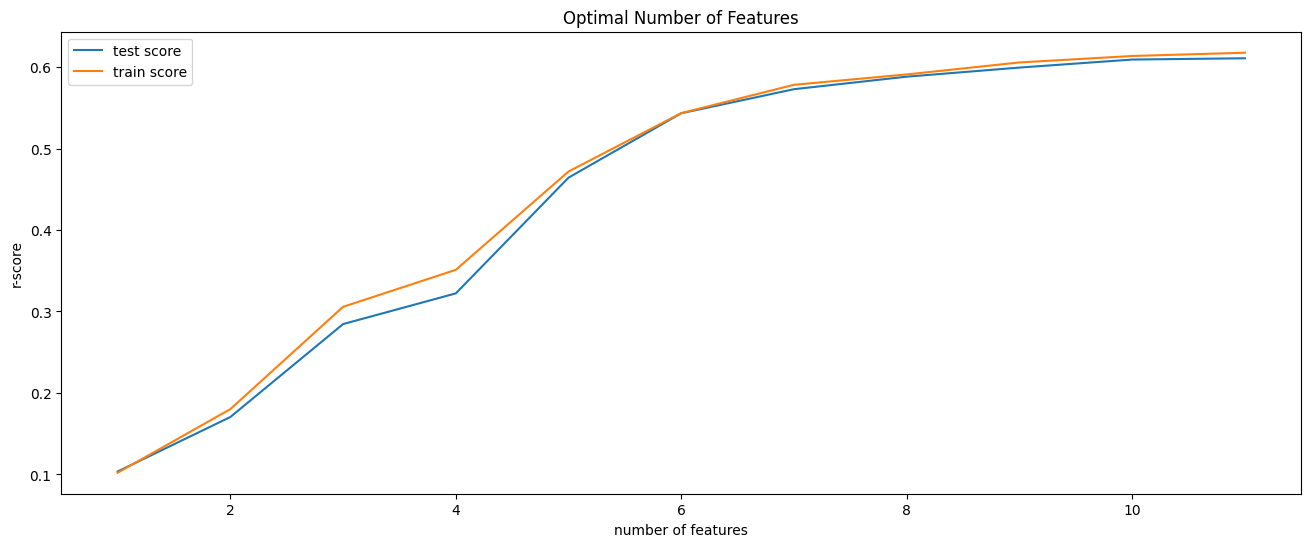

In [75]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)

hyper_params = [{'n_features_to_select': list(range(1, 12))}]

lm = LinearRegression()
lm.fit(x1_train, y1_train)
rfe = RFE(lm)
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(x1_train, y1_train)
plt.figure(figsize=(16,6))
cv_results = pd.DataFrame(model_cv.cv_results_)
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-score')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# KNN

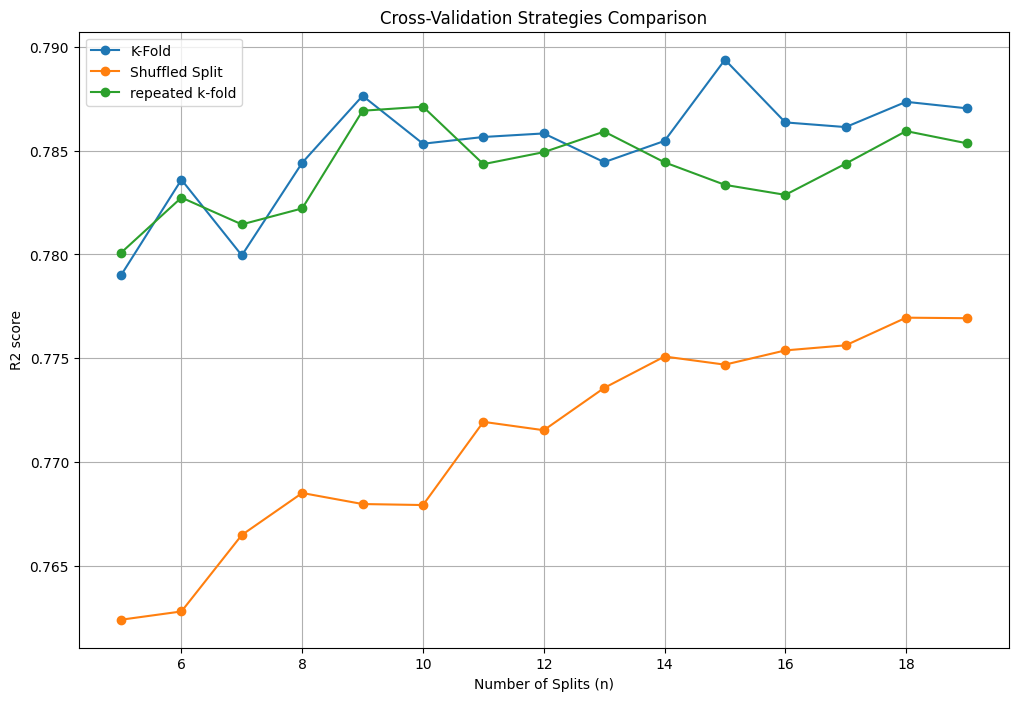

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, RepeatedKFold
import matplotlib.pyplot as plt

clf=KNeighborsRegressor(n_neighbors=5)
n_splits_values = np.arange(5,20)
accuracy_repeated = []
accuracy_kfold = []
accuracy_shuffled = []

for n_splits in n_splits_values:
    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x1, y1, cv=kfold_cv, scoring='r2')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(clf, x1, y1, cv=shuffled_cv, scoring='r2')
    accuracy_shuffled.append(np.mean(scores))

    repeated_cv = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=42)
    scores = cross_val_score(clf, x1, y1, cv=repeated_cv, scoring='r2')
    accuracy_repeated.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')
plt.plot(n_splits_values, accuracy_repeated, label='repeated k-fold', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True,random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2score = []

for train_index, test_index in kf.split(x1):
    X_train, X_test = x1.iloc[train_index], x1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

    regressor =  KNeighborsRegressor(n_neighbors=5)
    regressor.fit(X_train, y_train)

    y_test_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2score.append(r2)

mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2score)

mean_mae_scores1.append(mean_mae)
mean_mse_scores1.append(mean_mse)
mean_rmse_scores1.append(mean_r2)
mean_r2score1.append(mean_r2)

print("Mean MAE:", mean_mae)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)
print("Mean R2 Score:", mean_r2)

Mean MAE: 0.21698464636953094
Mean MSE: 0.0850973499958274
Mean RMSE: 0.29135336197774075
Mean R2 Score: 0.778998453609976


# DT

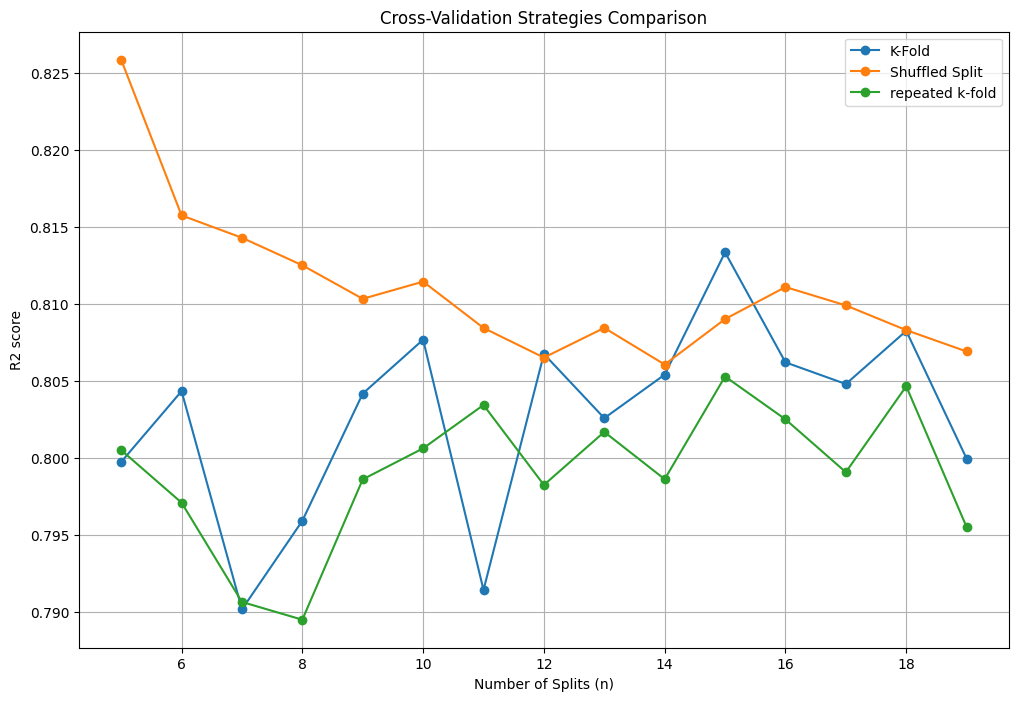

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, RepeatedKFold
import matplotlib.pyplot as plt

clf=DecisionTreeRegressor()
n_splits_values = np.arange(5,20)
accuracy_repeated = []
accuracy_kfold = []
accuracy_shuffled = []

for n_splits in n_splits_values:
    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x1, y1, cv=kfold_cv, scoring='r2')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(clf, x1, y1, cv=shuffled_cv, scoring='r2')
    accuracy_shuffled.append(np.mean(scores))

    repeated_cv = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=42)
    scores = cross_val_score(clf, x1, y1, cv=repeated_cv, scoring='r2')
    accuracy_repeated.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')
plt.plot(n_splits_values, accuracy_repeated, label='repeated k-fold', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

kf = KFold(n_splits=5, shuffle=True,random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2score = []

for train_index, test_index in kf.split(x1):
    X_train, X_test = x1.iloc[train_index], x1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

    regressor =  DecisionTreeRegressor()
    regressor.fit(X_train, y_train)

    y_test_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2score.append(r2)

mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2score)

mean_mae_scores1.append(mean_mae)
mean_mse_scores1.append(mean_mse)
mean_rmse_scores1.append(mean_r2)
mean_r2score1.append(mean_r2)

print("Mean MAE:", mean_mae)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)
print("Mean R2 Score:", mean_r2)

Mean MAE: 0.20338853676785687
Mean MSE: 0.07885838060310323
Mean RMSE: 0.28003387496909804
Mean R2 Score: 0.7950721931930627


# SVM

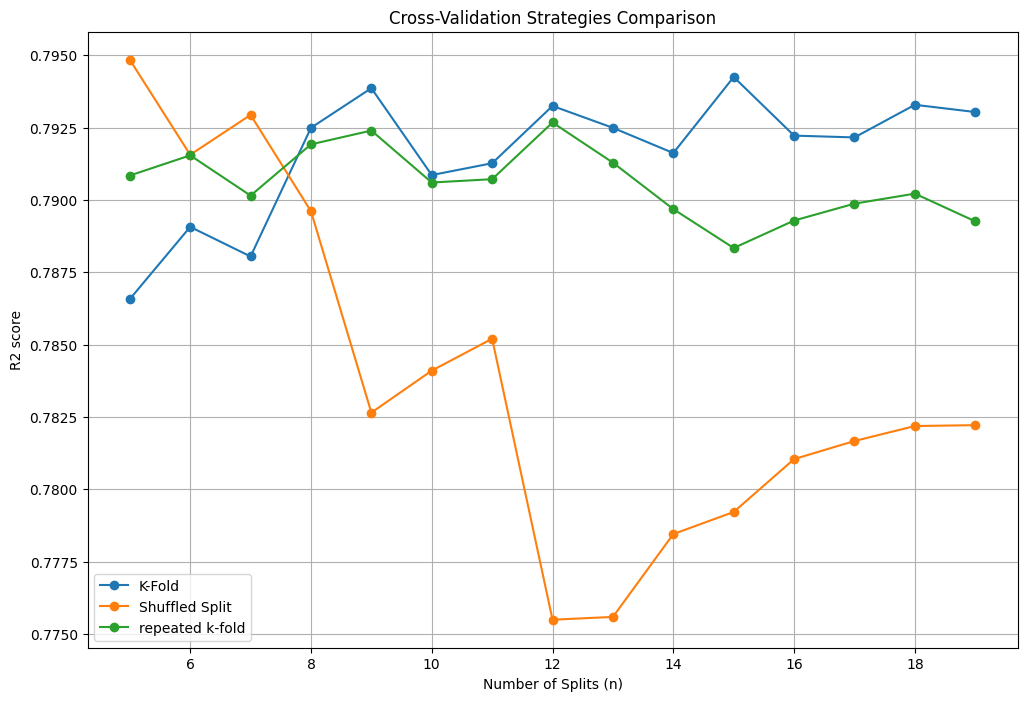

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, RepeatedKFold
import matplotlib.pyplot as plt

clf=SVR(kernel='rbf',C=1000,epsilon=0.1)
n_splits_values = np.arange(5,20)
accuracy_repeated = []
accuracy_kfold = []
accuracy_shuffled = []

for n_splits in n_splits_values:
    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x1, y1, cv=kfold_cv, scoring='r2')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(clf, x1, y1, cv=shuffled_cv, scoring='r2')
    accuracy_shuffled.append(np.mean(scores))

    repeated_cv = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=42)
    scores = cross_val_score(clf, x1, y1, cv=repeated_cv, scoring='r2')
    accuracy_repeated.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')
plt.plot(n_splits_values, accuracy_repeated, label='repeated k-fold', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

kf = KFold(n_splits=5,shuffle=True,random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2score = []
for train_index, test_index in kf.split(x1):
    X_train, X_test = x1.iloc[train_index], x1.iloc[test_index]
    y_train, y_test = y1.iloc[train_index], y1.iloc[test_index]

    regressor =  SVR(kernel='rbf',C=10000,epsilon=0.1)
    # print(X_train.shape, y_train.shape)
    regressor.fit(X_train, y_train)

    y_test_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2score.append(r2)

# Calculate mean scores across all folds
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2score)

mean_mae_scores1.append(mean_mae)
mean_mse_scores1.append(mean_mse)
mean_rmse_scores1.append(mean_r2)
mean_r2score1.append(mean_r2)

print("Mean MAE:", mean_mae)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)
print("Mean R2 Score:", mean_r2)

Mean MAE: 0.19537688402003814
Mean MSE: 0.06905823471831629
Mean RMSE: 0.2619789184487943
Mean R2 Score: 0.819478166030507


In [82]:
models_Compare00 = [('LinearRegression', ds1lr_normal_mae, ds1lr_normal_mse, ds1lr_normal_rmse, ds1lr_normal),
    ('KNeighbors', ds1knn_mae, ds1knn_mse, ds1knn_rmse, ds1knn_r2),
    ('DecisionTree', ds1dt_mae, ds1dt_mse, ds1dt_rmse, ds1dt_r2),
    ('SVM', ds1svm_mae, ds1svm_mse, ds1svm_rmse, ds1svm_r2),]

predict_Compare00 = pd.DataFrame(data = models_Compare00, columns=['Model', 'mae','mse', 'rmse', 'R2_Score'])
predict_Compare00

,Model,mae,mse,rmse,R2_Score
0,LinearRegression,0.213493,0.073017,0.270217,0.810489
1,KNeighbors,0.220878,0.085696,0.292738,0.777583
2,DecisionTree,0.179203,0.056909,0.238556,0.852297
3,SVM,0.195825,0.067912,0.260600,0.823739


In [83]:
models_Compare01 = [('LinearRegression', mean_mae_scores1[0], mean_mse_scores1[0], mean_rmse_scores1[0],mean_r2score1[0]),
    ('KNeighbors', mean_mae_scores1[1],  mean_mse_scores1[1], mean_rmse_scores1[1],mean_r2score1[1]),
    ('DecisionTree',mean_mae_scores1[2],  mean_mse_scores1[2], mean_rmse_scores1[2],mean_r2score1[2]),
    ('SVM', mean_mae_scores1[3],  mean_mse_scores1[3], mean_rmse_scores1[3],mean_r2score1[3]),]

predict_Compare01 = pd.DataFrame(data = models_Compare01, columns=['Model', 'mae','mse', 'rmse', 'R2_Score'])
predict_Compare01

,Model,mae,mse,rmse,R2_Score
0,LinearRegression,0.206387,0.070113,0.817470,0.817470
1,KNeighbors,0.216985,0.085097,0.778998,0.778998
2,DecisionTree,0.203389,0.078858,0.795072,0.795072
3,SVM,0.195377,0.069058,0.819478,0.819478


# -----------------------------------------------------------------------------------------------

# DATA SET 2

In [84]:
data2 = pd.read_csv('/content/Dataset2 (1).csv')
data2

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,...,weight,warranty,Touchscreen,msoffice,latest_price,old_price,discount,star_rating,ratings,reviews
0,Lenovo,A6-9225,Amd,A6-9225 processor,10th,4,Ddr4,0,1024,Windows,...,Thinnlight,0,No,No,24990.0,32790,23,3.7,63,12
1,Lenovo,Ideapad,Amd,Apu dual,10th,4,Ddr4,0,512,Windows,...,Casual,0,No,No,19590.0,21325,8,3.6,1894,256
2,Avita,Pura,Amd,Apu dual,10th,4,Ddr4,128,0,Windows,...,Thinnlight,0,No,No,19990.0,27990,28,3.7,1153,159
3,Avita,Pura,Amd,Apu dual,10th,4,Ddr4,128,0,Windows,...,Thinnlight,0,No,No,21490.0,27990,23,3.7,1153,159
4,Avita,Pura,Amd,Apu dual,10th,4,Ddr4,256,0,Windows,...,Thinnlight,0,No,No,24990.0,33490,25,3.7,1657,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,Asus,Rog,Amd,Ryzen 9,Unknown,4,Ddr4,1024,0,Windows,...,Casual,1,No,No,144990.0,194990,25,0.0,0,0
872,Asus,Ryzen,Amd,Ryzen 9,Unknown,4,Ddr4,1024,0,Windows,...,Casual,1,No,No,149990.0,0,0,0.0,0,0
873,Asus,Ryzen,Amd,Ryzen 9,Unknown,4,Ddr4,1024,0,Windows,...,Casual,1,No,No,142990.0,0,0,0.0,0,0
874,Samsung,Galaxy,Qualcomm,Snapdragon 7c,Unknown,4,Lpddr4x,0,512,Windows,...,Casual,0,No,No,38990.0,47990,18,0.0,0,0


In [85]:
columns_to_encode = ['brand','model','processor_brand','processor_name','os','weight']
df_encoded1 = pd.get_dummies(data2, columns=columns_to_encode)
df_encoded1

,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os_bit,graphic_card_gb,warranty,Touchscreen,msoffice,...,processor_name_Ryzen 5,processor_name_Ryzen 7,processor_name_Ryzen 9,processor_name_Snapdragon 7c,os_Dos,os_Mac,os_Windows,weight_Casual,weight_Gaming,weight_Thinnlight
0,10th,4,Ddr4,0,1024,64,0,0,No,No,...,0,0,0,0,0,0,1,0,0,1
1,10th,4,Ddr4,0,512,64,0,0,No,No,...,0,0,0,0,0,0,1,1,0,0
2,10th,4,Ddr4,128,0,64,0,0,No,No,...,0,0,0,0,0,0,1,0,0,1
3,10th,4,Ddr4,128,0,64,0,0,No,No,...,0,0,0,0,0,0,1,0,0,1
4,10th,4,Ddr4,256,0,64,0,0,No,No,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,Unknown,4,Ddr4,1024,0,64,0,1,No,No,...,0,0,1,0,0,0,1,1,0,0
872,Unknown,4,Ddr4,1024,0,64,4,1,No,No,...,0,0,1,0,0,0,1,1,0,0
873,Unknown,4,Ddr4,1024,0,64,4,1,No,No,...,0,0,1,0,0,0,1,1,0,0
874,Unknown,4,Lpddr4x,0,512,32,0,0,No,No,...,0,0,0,1,0,0,1,1,0,0


In [86]:
custom_mapping={'processor_gnrtn':{'4th':0,'7th':1,'8th':2,'Unknown':3,'9th':4,'10th':5,'11th':6,'12th':7},
                'ram_type':{'Ddr3':0,'Lpddr3':1,'Ddr4':2,'Lpddr4':3,'Lpddr4x':4,'Ddr5':5},
               'Touchscreen':{'No':0,'Yes':1},
                'msoffice':{'No':0,'Yes':1}}
df_encoded1.replace(custom_mapping,inplace=True)

In [87]:
x2 = df_encoded1.drop(columns=['latest_price','hdd','discount','star_rating','ratings','reviews'])
y2 = np.log(df_encoded1['latest_price'])

In [88]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.20, random_state=42)

# Linear Reg

In [89]:
step1 = LinearRegression()

pipe = Pipeline([
    ('step1', step1)])

pipe.fit(x2_train, y2_train)

y2_pred = pipe.predict(x2_test)

ds2lr_normal_mae = mean_absolute_error(y2_test, y2_pred)
ds2lr_normal = r2_score(y2_test, y2_pred)
ds2lr_normal_mse = mean_squared_error(y2_test, y2_pred)
ds2lr_normal_rmse = np.sqrt(mean_squared_error(y2_test, y2_pred))
print('MAE:', ds2lr_normal_mae)
print('RMSE:', ds2lr_normal_rmse)
print('MSE:', ds2lr_normal_mse)
print('R2 Score:', ds2lr_normal)

MAE: 0.12365852939515545
RMSE: 0.17627961913322332
MSE: 0.031074504121754276
R2 Score: 0.8772386102238375


# KNN

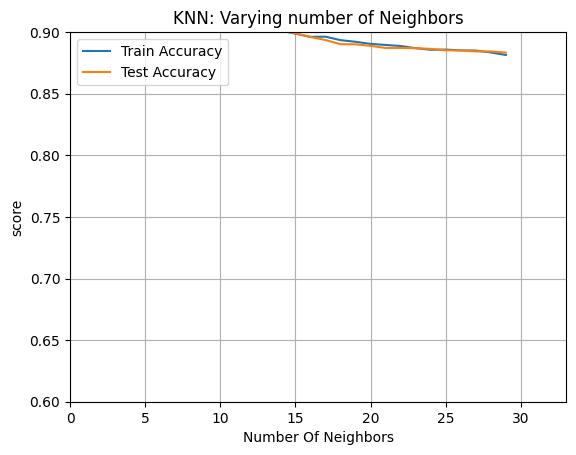

In [154]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsRegressor(n_neighbors=neighbor)
    knn.fit(x2_train, y2_train)
    train_score[neighbor]=knn.score(x2_train, y2_train)
    test_score[neighbor]=knn.score(x2_test, y2_test)

plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("score")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

In [133]:
step1 = KNeighborsRegressor(n_neighbors=5)

pipe = Pipeline([
    ('step1', step1)])

pipe.fit(x2_train, y2_train)
y2_pred_knn = pipe.predict(x2_test)

ds2knn_mae = mean_absolute_error(y2_test, y2_pred_knn)
ds2knn_rmse = np.sqrt(mean_squared_error(y2_test, y2_pred_knn))
ds2knn_mse = mean_squared_error(y2_test, y2_pred_knn)
ds2knn_r2 = r2_score(y2_test, y2_pred_knn)

print('KNN Results:')
print('MAE:', ds2knn_mae)
print('RMSE:', ds2knn_rmse)
print('MSE:', ds2knn_mse)
print('R2 Score:', ds2knn_r2)

KNN Results:
MAE: 0.11285923988443494
RMSE: 0.14770333571701724
MSE: 0.0218162753819339
R2 Score: 0.9138137080118114


# Decision Tree

In [92]:
step1 = DecisionTreeRegressor(random_state=42)

pipe = Pipeline([
    ('step1', step1)])
pipe.fit(x2_train, y2_train)
y2_pred_dt = pipe.predict(x2_test)

ds2dt_mae = mean_absolute_error(y2_test, y2_pred_dt)
ds2dt_rmse = np.sqrt(mean_squared_error(y2_test, y2_pred_dt))
ds2dt_mse = mean_squared_error(y2_test, y2_pred_dt)
ds2dt_r2 = r2_score(y2_test, y2_pred_dt)

print('Decision Tree Results:')
print('MAE:', ds2dt_mae)
print('RMSE:', ds2dt_rmse)
print('MSE:', ds2dt_mse)
print('R2 Score:', ds2dt_r2)

Decision Tree Results:
MAE: 0.11327403855369565
RMSE: 0.19510021230976216
MSE: 0.03806409284331427
R2 Score: 0.8496258888088625


# SVM

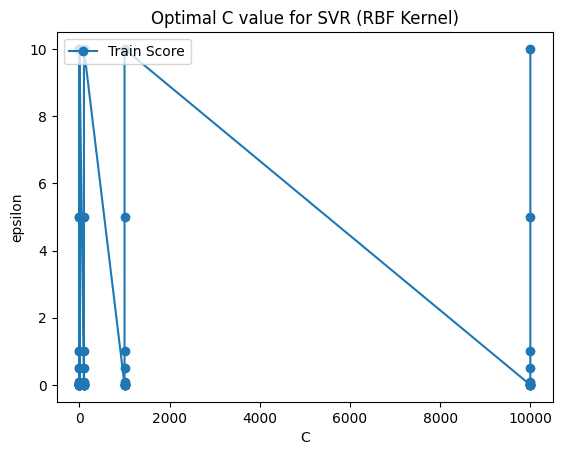

{'C': 10000, 'epsilon': 0.1}

In [93]:
gsc = GridSearchCV(
    estimator=SVR(kernel='rbf'),
    param_grid={
        'C': [0.1, 1, 100, 1000, 10000],
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},cv=5, scoring='r2', verbose=0, n_jobs=-1)
gsc = gsc.fit(x2_train, y2_train)
results = pd.DataFrame(gsc.cv_results_)
plt.plot(results["param_C"], results["param_epsilon"], label='Train Score',marker='o')
plt.xlabel('C')
plt.ylabel('epsilon')
plt.title("Optimal C value for SVR (RBF Kernel)")
plt.legend(loc='upper left')
plt.show()
gsc.best_params_

In [136]:
step1 = SVR(kernel='rbf', C=1000, epsilon=0.1)

pipe = Pipeline([
    ('step1', step1)])

pipe.fit(x2_train, y2_train)
y2_pred_svm = pipe.predict(x2_test)

ds2svm_mae = mean_absolute_error(y2_test, y2_pred_svm)
ds2svm_rmse = np.sqrt(mean_squared_error(y2_test, y2_pred_svm))
ds2svm_mse = mean_squared_error(y2_test, y2_pred_svm)
ds2svm_r2 = r2_score(y2_test, y2_pred_svm)

print('SVM Results:')
print('MAE:', ds2svm_mae)
print('RMSE:', ds2svm_rmse)
print('MSE:', ds2svm_mse)
print('R2 Score:', ds2svm_r2)

SVM Results:
MAE: 0.11483327360828807
RMSE: 0.16102786236912026
MSE: 0.025929972459168338
R2 Score: 0.8975623410281014


# Model Evaluation - Partitioning

In [95]:
mean_mae_scores2 = []
mean_mse_scores2 = []
mean_rmse_scores2 = []
mean_r2score2 = []

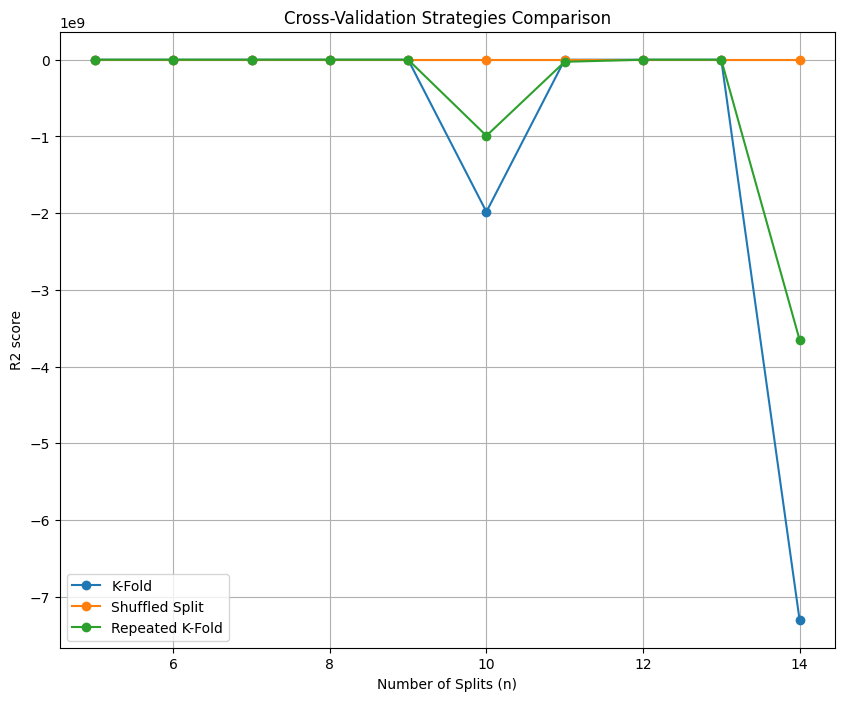

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit, RepeatedKFold
import matplotlib.pyplot as plt

clf = LinearRegression()
n_splits_values = np.arange(5, 15)
accuracy_repeated = []
accuracy_kfold = []
accuracy_shuffled = []

for n_splits in n_splits_values:
    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x2, y2, cv=kfold_cv, scoring='r2')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(clf, x2, y2, cv=shuffled_cv, scoring='r2')
    accuracy_shuffled.append(np.mean(scores))

    repeated_cv = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=42)
    scores = cross_val_score(clf, x2, y2, cv=repeated_cv, scoring='r2')
    accuracy_repeated.append(np.mean(scores))

plt.figure(figsize=(10, 8))
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')
plt.plot(n_splits_values, accuracy_repeated, label='Repeated K-Fold', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()

In [137]:
from sklearn.model_selection import KFold,StratifiedKFold
import numpy as np

# Assuming you have your features in X and labels in Y
kf = KFold(n_splits=5,shuffle=True,random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2score = []
for train_index, test_index in kf.split(x2):
    X_train, X_test = x2.iloc[train_index], x2.iloc[test_index]
    y_train, y_test = y2.iloc[train_index], y2.iloc[test_index]

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    y_test_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2score.append(r2)

mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2score)

mean_mae_scores2.append(mean_mae)
mean_mse_scores2.append(mean_mse)
mean_rmse_scores2.append(mean_r2)
mean_r2score2.append(mean_r2)

print("Mean MAE:", mean_mae)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)
print("Mean R2 Score:", mean_r2)

Mean MAE: 0.1357489963584137
Mean MSE: 0.038621100450168186
Mean RMSE: 0.19504070601707496
Mean R2 Score: 0.8556870634829897


# KNN

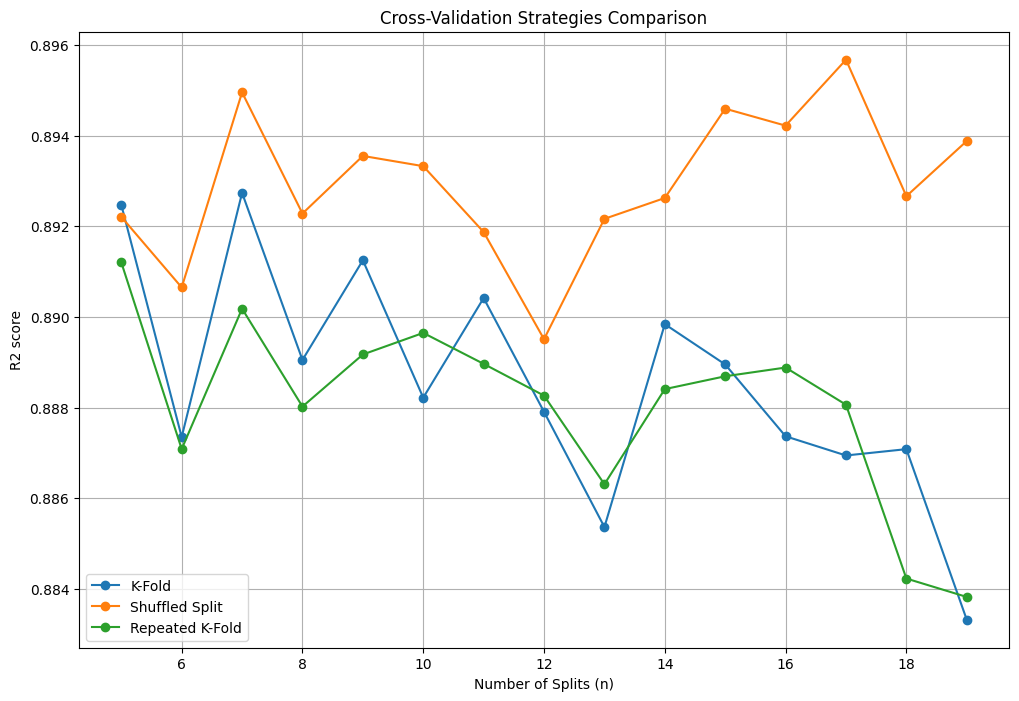

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, RepeatedKFold
import matplotlib.pyplot as plt

clf = KNeighborsRegressor(n_neighbors=5)
n_splits_values = np.arange(5, 20)
accuracy_repeated = []
accuracy_kfold = []
accuracy_shuffled = []

for n_splits in n_splits_values:
    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x2, y2, cv=kfold_cv, scoring='r2')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(clf, x2, y2, cv=shuffled_cv, scoring='r2')
    accuracy_shuffled.append(np.mean(scores))

    repeated_cv = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=42)
    scores = cross_val_score(clf, x2, y2, cv=repeated_cv, scoring='r2')
    accuracy_repeated.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')
plt.plot(n_splits_values, accuracy_repeated, label='Repeated K-Fold', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()

In [143]:
from sklearn.model_selection import KFold
import numpy as np

# Assuming you have your features in X and labels in Y
kf = KFold(n_splits=5,shuffle=True,random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2score = []
for train_index, test_index in kf.split(x2):
    # Split the data into training and testing sets
    X_train, X_test = x2.iloc[train_index], x2.iloc[test_index]
    y_train, y_test = y2.iloc[train_index], y2.iloc[test_index]

    regressor = KNeighborsRegressor(n_neighbors=5)
    regressor.fit(X_train, y_train)

    y_test_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2score.append(r2)

# Calculate mean scores across all folds
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2score)

mean_mae_scores2.append(mean_mae)
mean_mse_scores2.append(mean_mse)
mean_rmse_scores2.append(mean_r2)
mean_r2score2.append(mean_r2)

print("Mean MAE:", mean_mae)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)
print("Mean R2 Score:", mean_r2)

Mean MAE: 0.11730756308455129
Mean MSE: 0.027904545656628588
Mean RMSE: 0.1663440124358595
Mean R2 Score: 0.8924711533815237


# DT

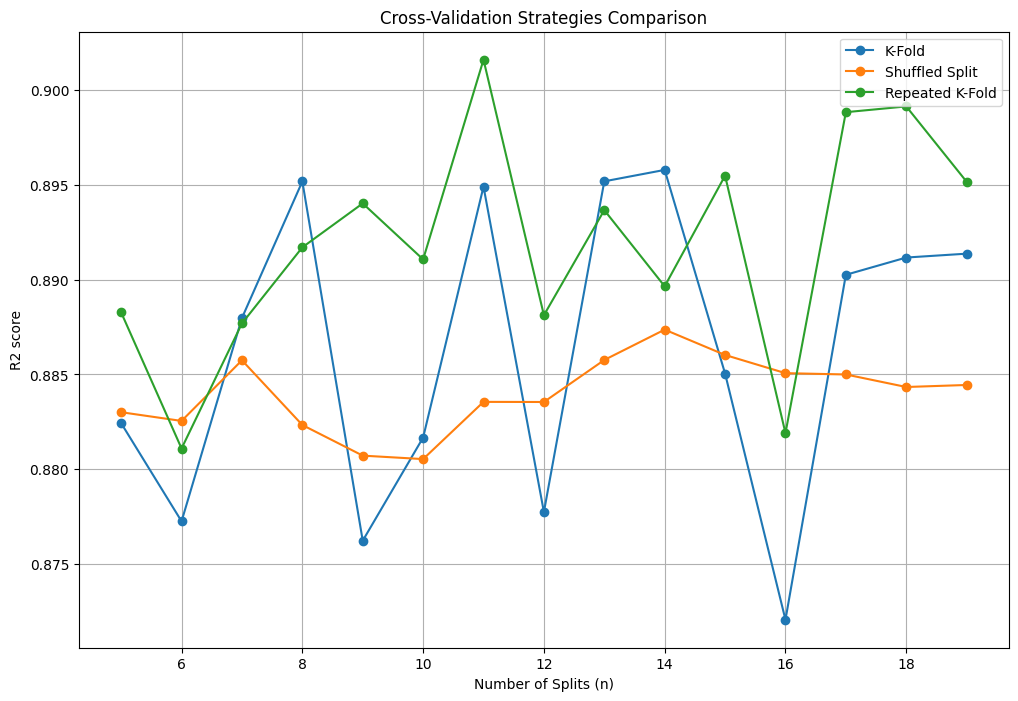

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, RepeatedKFold
import matplotlib.pyplot as plt

clf = DecisionTreeRegressor(random_state=42)
n_splits_values = np.arange(5, 20)
accuracy_repeated = []
accuracy_kfold = []
accuracy_shuffled = []

for n_splits in n_splits_values:
    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x2, y2, cv=kfold_cv, scoring='r2')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(clf, x2, y2, cv=shuffled_cv, scoring='r2')
    accuracy_shuffled.append(np.mean(scores))

    repeated_cv = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=42)
    scores = cross_val_score(clf, x2, y2, cv=repeated_cv, scoring='r2')
    accuracy_repeated.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')
plt.plot(n_splits_values, accuracy_repeated, label='Repeated K-Fold', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()

In [145]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have your features in X and labels in Y
kf = KFold(n_splits=5,shuffle=True,random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2score = []
for train_index, test_index in kf.split(x2):
    # Split the data into training and testing sets
    X_train, X_test = x2.iloc[train_index], x2.iloc[test_index]
    y_train, y_test = y2.iloc[train_index], y2.iloc[test_index]

    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_test_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2score.append(r2)

# Calculate mean scores across all folds
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2score)

mean_mae_scores2.append(mean_mae)
mean_mse_scores2.append(mean_mse)
mean_rmse_scores2.append(mean_r2)
mean_r2score2.append(mean_r2)

print("Mean MAE:", mean_mae)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)
print("Mean R2 Score:", mean_r2)

Mean MAE: 0.1153907795528986
Mean MSE: 0.03075172639375709
Mean RMSE: 0.17414144624457237
Mean R2 Score: 0.882431784073131


# SVM

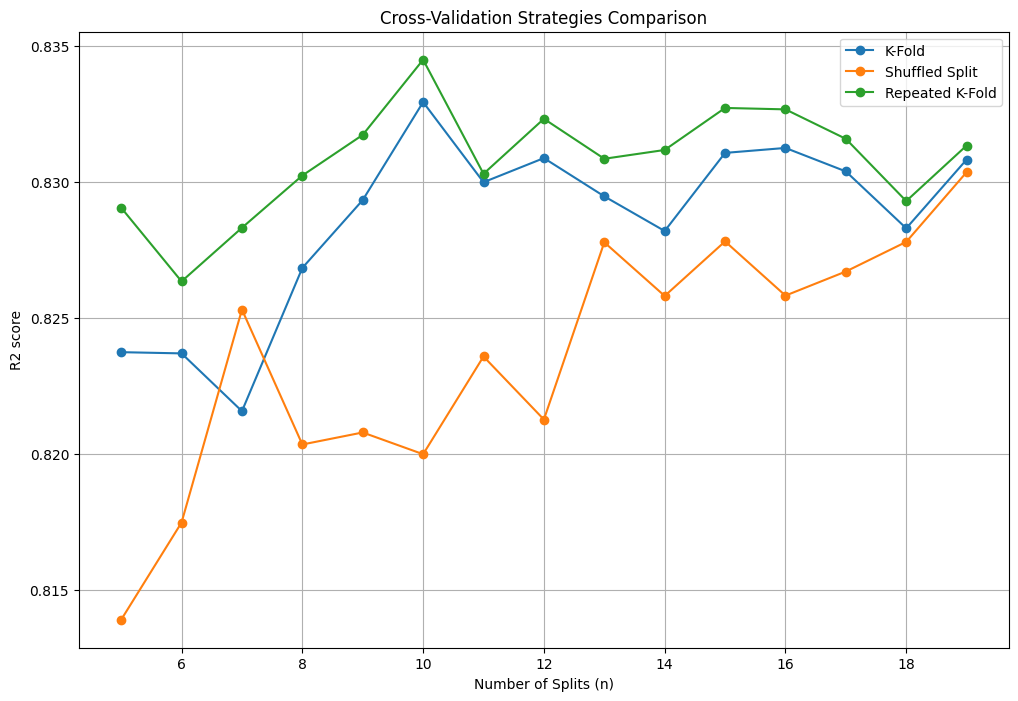

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, RepeatedKFold
import matplotlib.pyplot as plt

clf = SVR(kernel='rbf',C=10,epsilon=0.1)
n_splits_values = np.arange(5, 20)
accuracy_repeated = []
accuracy_kfold = []
accuracy_shuffled = []

for n_splits in n_splits_values:
    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x2, y2, cv=kfold_cv, scoring='r2')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(clf, x2, y2, cv=shuffled_cv, scoring='r2')
    accuracy_shuffled.append(np.mean(scores))

    repeated_cv = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=42)
    scores = cross_val_score(clf, x2, y2, cv=repeated_cv, scoring='r2')
    accuracy_repeated.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')
plt.plot(n_splits_values, accuracy_repeated, label='Repeated K-Fold', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()

In [148]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have your features in X and labels in Y
kf = KFold(n_splits=5,shuffle=True,random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2score = []
for train_index, test_index in kf.split(x2):
    # Split the data into training and testing sets
    X_train, X_test = x2.iloc[train_index], x2.iloc[test_index]
    y_train, y_test = y2.iloc[train_index], y2.iloc[test_index]

    regressor = SVR(kernel='rbf',C=10,epsilon=0.1)
    regressor.fit(X_train, y_train)

    # Make predictions on the test set
    y_test_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2score.append(r2)

# Calculate mean scores across all folds
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2score)

mean_mae_scores2.append(mean_mae)
mean_mse_scores2.append(mean_mse)
mean_rmse_scores2.append(mean_r2)
mean_r2score2.append(mean_r2)

print("Mean MAE:", mean_mae)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)
print("Mean R2 Score:", mean_r2)

Mean MAE: 0.13536333599972541
Mean MSE: 0.04593105062907939
Mean RMSE: 0.21308880639702368
Mean R2 Score: 0.823743482771893


In [149]:
models_Compare10 = [('LinearRegression', ds2lr_normal_mae, ds2lr_normal_mse, ds2lr_normal_rmse, ds2lr_normal),
    ('KNeighbors', ds2knn_mae, ds2knn_mse, ds2knn_rmse, ds2knn_r2),
    ('DecisionTree', ds2dt_mae, ds2dt_mse, ds2dt_rmse, ds2dt_r2),
    ('SVM', ds2svm_mae, ds2svm_mse, ds2svm_rmse, ds2svm_r2),]

predict_Compare10 = pd.DataFrame(data = models_Compare10, columns=['Model', 'mae','mse', 'rmse', 'R2_Score'])
predict_Compare10

,Model,mae,mse,rmse,R2_Score
0,LinearRegression,0.123659,0.031075,0.176280,0.877239
1,KNeighbors,0.112859,0.021816,0.147703,0.913814
2,DecisionTree,0.113274,0.038064,0.195100,0.849626
3,SVM,0.114833,0.025930,0.161028,0.897562


In [150]:
models_Compare11 = [('LinearRegression', mean_mae_scores2[0], mean_mse_scores2[0], mean_rmse_scores2[0],mean_r2score2[0]),
    ('KNeighbors', mean_mae_scores2[1],  mean_mse_scores2[1], mean_rmse_scores2[1],mean_r2score2[1]),
    ('DecisionTree',mean_mae_scores2[2],  mean_mse_scores2[2], mean_rmse_scores2[2],mean_r2score2[2]),
    ('SVM', mean_mae_scores2[3],  mean_mse_scores2[3], mean_rmse_scores2[3],mean_r2score2[3]),]

predict_Compare11 = pd.DataFrame(data = models_Compare11, columns=['Model', 'mae','mse', 'rmse', 'R2_Score'])
predict_Compare11

,Model,mae,mse,rmse,R2_Score
0,LinearRegression,0.135749,0.038621,0.855687,0.855687
1,KNeighbors,0.117308,0.027905,0.892471,0.892471
2,DecisionTree,0.115391,0.030752,0.882432,0.882432
3,SVM,0.135363,0.045931,0.823743,0.823743


# -------------------------------------------------------------------------------------------------

# DATA SET 3

In [105]:
data3 = pd.read_csv("/content/Dataset3.csv")
data3.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,Unknown,15.6,No,83747.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,Unknown,15.6,No,24817.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,Unknown,15.6,No,65487.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,99517.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,Unknown,15.6,No,55527.83


In [106]:
# columns_to_encode3 = ['Brand','Status','CPU','Storage', 'Storage type','Touch','GPU']
# data_encoded3 = pd.get_dummies(data3, columns=columns_to_encode3)

In [107]:
df=data3.copy()

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Laptop'] = le.fit_transform(df['Laptop'])
df['Status'] = le.fit_transform(df['Status'])
df['Brand'] = le.fit_transform(df['Brand'])
df['Model'] = le.fit_transform(df['Model'])
df['Storage type'] = le.fit_transform(df['Storage type'])
df['CPU'] = le.fit_transform(df['CPU'])
df['GPU'] = le.fit_transform(df['GPU'])
df['Touch'] = le.fit_transform(df['Touch'])
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,39,0,3,42,17,8,512,0,44,15.6,0,83747.00
1,486,0,1,54,14,8,256,0,44,15.6,0,24817.00
2,33,0,3,42,16,8,256,0,44,15.6,0,65487.00
3,1732,0,14,58,18,16,1000,0,17,15.6,0,99517.00
4,941,0,9,4,17,16,512,0,44,15.6,0,55527.83
...,...,...,...,...,...,...,...,...,...,...,...,...
2151,2106,1,21,22,18,16,1000,0,18,17.3,0,224099.17
2152,2107,1,21,22,18,16,1000,0,19,17.3,0,240699.17
2153,2108,1,21,22,18,32,1000,0,20,17.3,0,282199.17
2154,2115,1,21,23,21,16,1000,0,44,13.4,1,157699.17


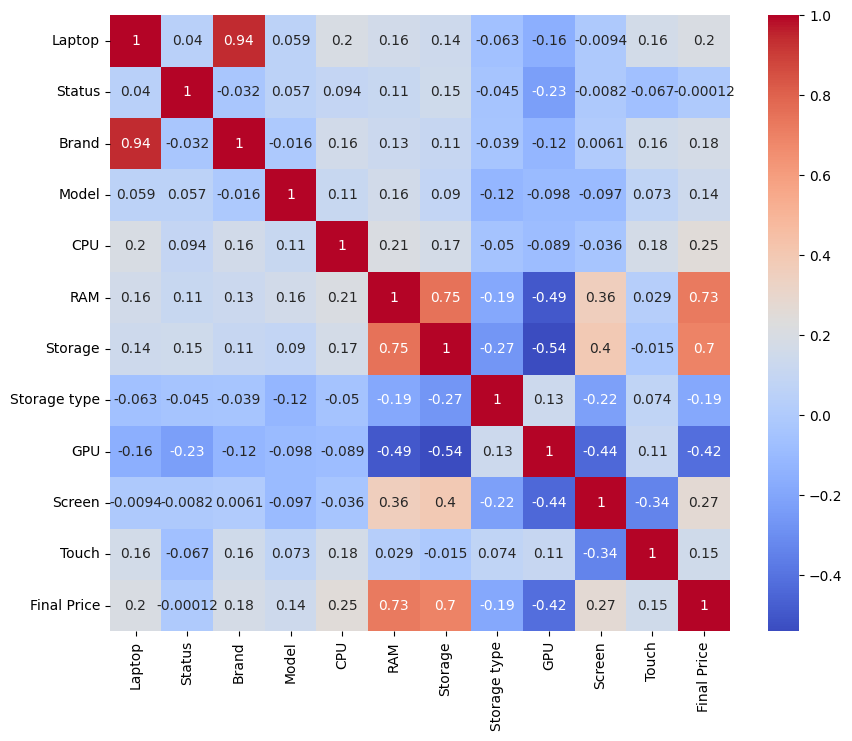

In [109]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [110]:
df = df.drop(['Laptop','Model','Status'], axis = 1)
df.head(n=3)

,Brand,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,3,17,8,512,0,44,15.6,0,83747.0
1,1,14,8,256,0,44,15.6,0,24817.0
2,3,16,8,256,0,44,15.6,0,65487.0


In [111]:
x3= df.drop(columns=["Final Price"],axis=1)
y3= np.log(df["Final Price"])

In [112]:
x3.head()

,Brand,CPU,RAM,Storage,Storage type,GPU,Screen,Touch
0,3,17,8,512,0,44,15.6,0
1,1,14,8,256,0,44,15.6,0
2,3,16,8,256,0,44,15.6,0
3,14,18,16,1000,0,17,15.6,0
4,9,17,16,512,0,44,15.6,0


In [113]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.20, random_state=42)

In [114]:
x3_train

,Brand,CPU,RAM,Storage,Storage type,GPU,Screen,Touch
1125,3,7,16,512,0,44,14.0,0
1185,9,17,8,256,0,44,14.0,1
925,9,18,32,512,0,26,16.0,0
807,0,17,8,512,0,44,15.6,0
1361,8,18,16,512,0,19,15.6,0
...,...,...,...,...,...,...,...,...
1638,16,18,16,512,0,17,14.4,1
1095,0,17,8,256,0,44,15.6,0
1130,2,15,8,256,1,44,12.0,0
1294,0,17,16,512,0,44,14.0,0


In [115]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x3_train = scaler.fit_transform(x3_train)
x3_test = scaler.transform(x3_test)

# Linear Regression

In [116]:
step1 = LinearRegression()

pipe = Pipeline([
    ('step1', step1)])

pipe.fit(x3_train, y3_train)

y3_pred = pipe.predict(x3_test)

ds3lr_normal_mae = mean_absolute_error(y3_test, y3_pred)
ds3lr_normal = r2_score(y3_test, y3_pred)
ds3lr_normal_mse = mean_squared_error(y3_test, y3_pred)
ds3lr_normal_rmse = np.sqrt(mean_squared_error(y3_test, y3_pred))
print('MAE:', ds3lr_normal_mae)
print('RMSE:', ds3lr_normal_rmse)
print('MSE:', ds3lr_normal_mse)
print('R2 Score:', ds3lr_normal)

MAE: 0.3282023851099675
RMSE: 0.43078499356741123
MSE: 0.18557571068287454
R2 Score: 0.5590557810934891


# KNN

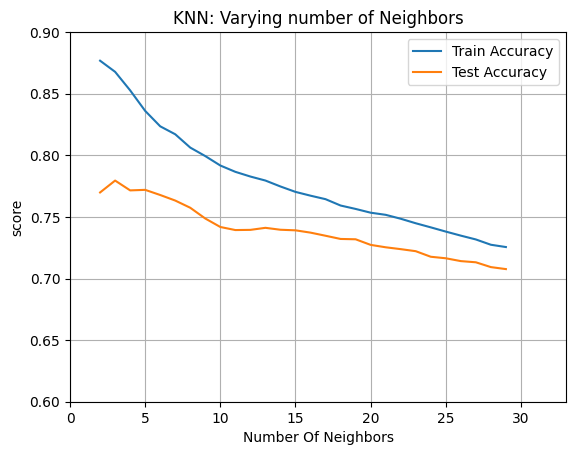

In [152]:
train_score = {}
test_score = {}
n_neighbors = np.arange(2, 30, 1)
for neighbor in n_neighbors:
    knn = KNeighborsRegressor(n_neighbors=neighbor)
    knn.fit(x3_train, y3_train)
    train_score[neighbor]=knn.score(x3_train, y3_train)
    test_score[neighbor]=knn.score(x3_test, y3_test)

plt.plot(n_neighbors, train_score.values(), label="Train Accuracy")
plt.plot(n_neighbors, test_score.values(), label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("score")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.xlim(0, 33)
plt.ylim(0.60, 0.90)
plt.grid()
plt.show()

In [117]:
step1 = KNeighborsRegressor(n_neighbors=5)
pipe = Pipeline([('step1', step1)])
pipe.fit(x3_train, y3_train)
y3_pred_knn = pipe.predict(x3_test)

ds3knn_mae = mean_absolute_error(y3_test, y3_pred_knn)
ds3knn_rmse = np.sqrt(mean_squared_error(y3_test, y3_pred_knn))
ds3knn_mse = mean_squared_error(y3_test, y3_pred_knn)
ds3knn_r2 = r2_score(y3_test, y3_pred_knn)

print('KNN Results:')
print('MAE:', ds3knn_mae)
print('RMSE:', ds3knn_rmse)
print('MSE:', ds3knn_mse)
print('R2 Score:', ds3knn_r2)

KNN Results:
MAE: 0.22894050382012954
RMSE: 0.30978898425954926
MSE: 0.09596921476856325
R2 Score: 0.7719687005940672


# Decision Tree

In [118]:
step1_dt = DecisionTreeRegressor(random_state=42)
pipe_dt = Pipeline([('step1', step1_dt)])
pipe_dt.fit(x3_train, y3_train)
y3_pred_dt = pipe_dt.predict(x3_test)

ds3dt_mae = mean_absolute_error(y3_test, y3_pred_dt)
ds3dt_rmse = np.sqrt(mean_squared_error(y3_test, y3_pred_dt))
ds3dt_mse = mean_squared_error(y3_test, y3_pred_dt)
ds3dt_r2 = r2_score(y3_test, y3_pred_dt)

print('Decision Tree Results:')
print('MAE:', ds3dt_mae)
print('RMSE:', ds3dt_rmse)
print('MSE:', ds3dt_mse)
print('R2 Score:', ds3dt_r2)

Decision Tree Results:
MAE: 0.21360049177215237
RMSE: 0.2900455790012623
MSE: 0.08412643789817752
R2 Score: 0.800108180580864


# SVM

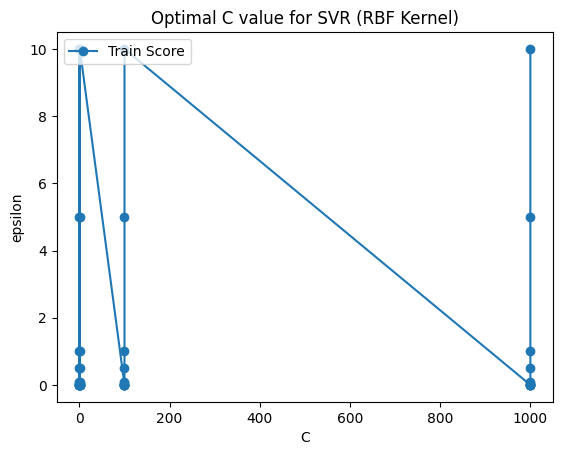

{'C': 1, 'epsilon': 0.05}

In [156]:
gsc = GridSearchCV(
    estimator=SVR(kernel='rbf'),
    param_grid={
        'C': [0.1, 1, 100, 1000],
        'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},cv=5, scoring='r2', verbose=0, n_jobs=-1)
gsc = gsc.fit(x3_train, y3_train)
results = pd.DataFrame(gsc.cv_results_)
plt.plot(results["param_C"], results["param_epsilon"], label='Train Score',marker='o')
plt.xlabel('C')
plt.ylabel('epsilon')
plt.title("Optimal C value for SVR (RBF Kernel)")
plt.legend(loc='upper left')
plt.show()
gsc.best_params_

In [158]:
step1_svm = SVR(kernel='rbf', C=10, epsilon=0.1)
pipe_svm = Pipeline([('step1', step1_svm)])
pipe_svm.fit(x3_train, y3_train)
y3_pred_svm = pipe_svm.predict(x3_test)

ds3svm_mae = mean_absolute_error(y3_test, y3_pred_svm)
ds3svm_rmse = np.sqrt(mean_squared_error(y3_test, y3_pred_svm))
ds3svm_mse = mean_squared_error(y3_test, y3_pred_svm)
ds3svm_r2 = r2_score(y3_test, y3_pred_svm)

print('SVM Results:')
print('MAE:', ds3svm_mae)
print('RMSE:', ds3svm_rmse)
print('MSE:', ds3svm_mse)
print('R2 Score:', ds3svm_r2)

SVM Results:
MAE: 0.2285341072607857
RMSE: 0.3206631016977254
MSE: 0.10282482479040578
R2 Score: 0.7556791679009939


In [120]:
mean_mae_scores3 = []
mean_mse_scores3 = []
mean_rmse_scores3 = []
mean_r2score3 = []

# Model Evaluation - Partitioning

# LR

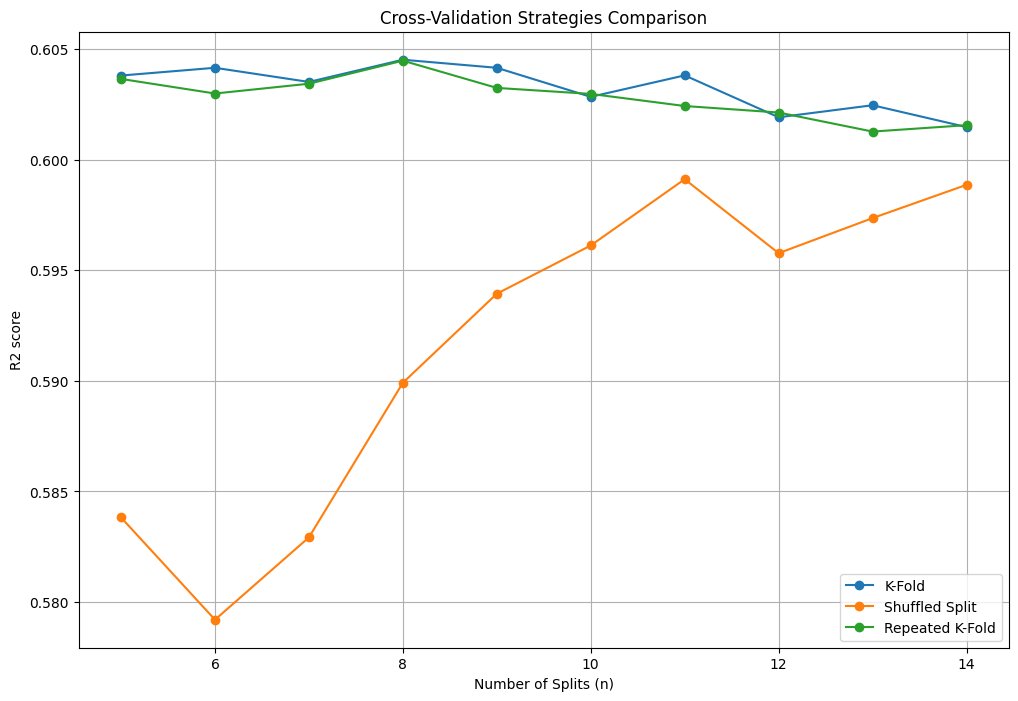

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, RepeatedKFold
import matplotlib.pyplot as plt

clf = LinearRegression()
n_splits_values = np.arange(5, 15)
accuracy_repeated = []
accuracy_kfold = []
accuracy_shuffled = []

for n_splits in n_splits_values:
    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x3, y3, cv=kfold_cv, scoring='r2')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.15, random_state=42)
    scores = cross_val_score(clf, x3, y3, cv=shuffled_cv, scoring='r2')
    accuracy_shuffled.append(np.mean(scores))

    repeated_cv = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=42)
    scores = cross_val_score(clf, x3, y3, cv=repeated_cv, scoring='r2')
    accuracy_repeated.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')
plt.plot(n_splits_values, accuracy_repeated, label='Repeated K-Fold', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
from sklearn.model_selection import KFold,StratifiedKFold
import numpy as np

# Assuming you have your features in X and labels in Y
kf = KFold(n_splits=5,shuffle=True,random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2score = []
for train_index, test_index in kf.split(x3):
    X_train, X_test = x3.iloc[train_index], x3.iloc[test_index]
    y_train, y_test = y3.iloc[train_index], y3.iloc[test_index]

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    y_test_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2score.append(r2)

# Calculate mean scores across all folds
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2score)

mean_mae_scores3.append(mean_mae)
mean_mse_scores3.append(mean_mse)
mean_rmse_scores3.append(mean_r2)
mean_r2score3.append(mean_r2)

print("Mean MAE:", mean_mae)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)
print("Mean R2 Score:", mean_r2)

Mean MAE: 0.3201681763004761
Mean MSE: 0.1662456590034738
Mean RMSE: 0.40732078435402175
Mean R2 Score: 0.6038023448093672


Fitting 5 folds for each of 11 candidates, totalling 55 fits


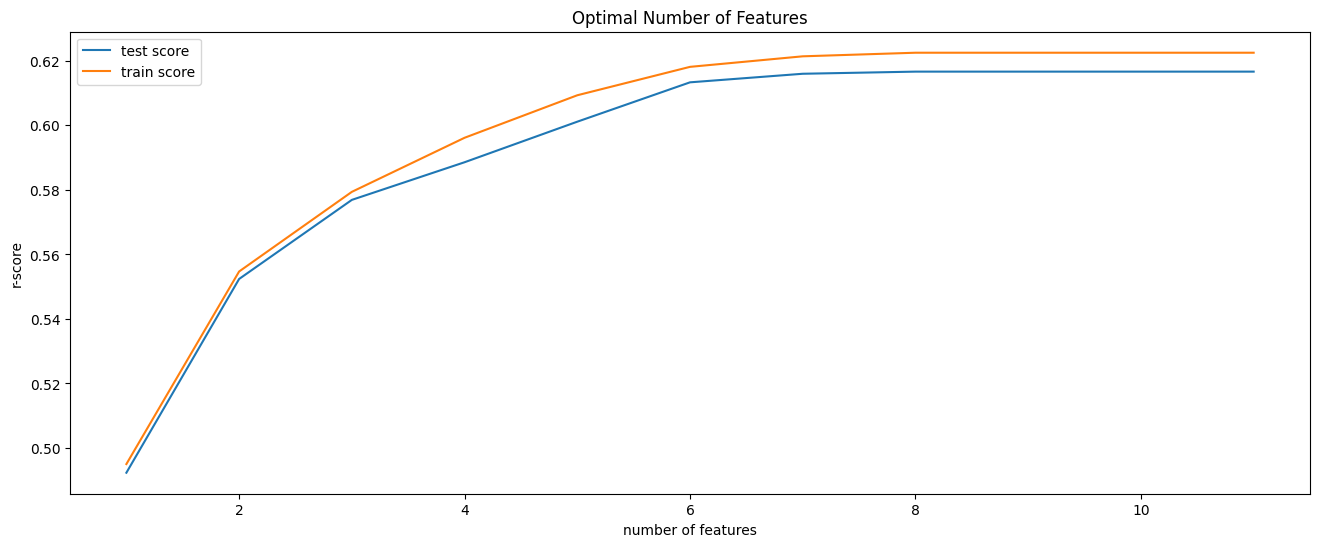

In [123]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

folds = KFold(n_splits = 5, shuffle = True, random_state = 42)
hyper_params = [{'n_features_to_select': list(range(1, 12))}]

lm = LinearRegression()
lm.fit(x3_train, y3_train)
rfe = RFE(lm)
model_cv = GridSearchCV(estimator = rfe,
                        param_grid = hyper_params,
                        scoring= 'r2',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

model_cv.fit(x3_train, y3_train)
plt.figure(figsize=(16,6))
cv_results = pd.DataFrame(model_cv.cv_results_)
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-score')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

# KNN

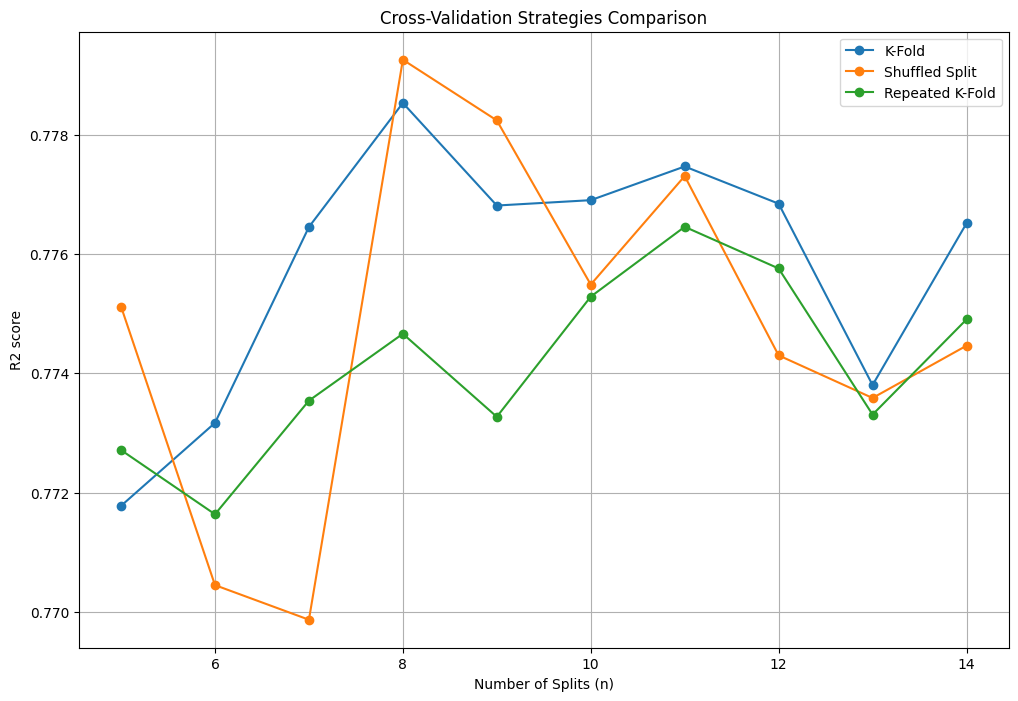

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, RepeatedKFold
import matplotlib.pyplot as plt

clf = KNeighborsRegressor(n_neighbors=5)
n_splits_values = np.arange(5, 15)
accuracy_repeated = []
accuracy_kfold = []
accuracy_shuffled = []

for n_splits in n_splits_values:
    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x3, y3, cv=kfold_cv, scoring='r2')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.15, random_state=42)
    scores = cross_val_score(clf, x3, y3, cv=shuffled_cv, scoring='r2')
    accuracy_shuffled.append(np.mean(scores))

    repeated_cv = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=42)
    scores = cross_val_score(clf, x3, y3, cv=repeated_cv, scoring='r2')
    accuracy_repeated.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')
plt.plot(n_splits_values, accuracy_repeated, label='Repeated K-Fold', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()

In [160]:
from sklearn.model_selection import KFold
import numpy as np

# Assuming you have your features in X and labels in Y
kf = KFold(n_splits=5,shuffle=True,random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2score = []
for train_index, test_index in kf.split(x3):
    X_train, X_test = x3.iloc[train_index], x3.iloc[test_index]
    y_train, y_test = y3.iloc[train_index], y3.iloc[test_index]

    regressor = KNeighborsRegressor(n_neighbors=5)
    regressor.fit(X_train, y_train)

    y_test_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    # Append scores to lists
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2score.append(r2)

# Calculate mean scores across all folds
mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2score)

mean_mae_scores3.append(mean_mae)
mean_mse_scores3.append(mean_mse)
mean_rmse_scores3.append(mean_r2)
mean_r2score3.append(mean_r2)

print("Mean MAE:", mean_mae)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)
print("Mean R2 Score:", mean_r2)

Mean MAE: 0.22897224573897484
Mean MSE: 0.09599147014035682
Mean RMSE: 0.3096193887097044
Mean R2 Score: 0.7717778245614625


# DT

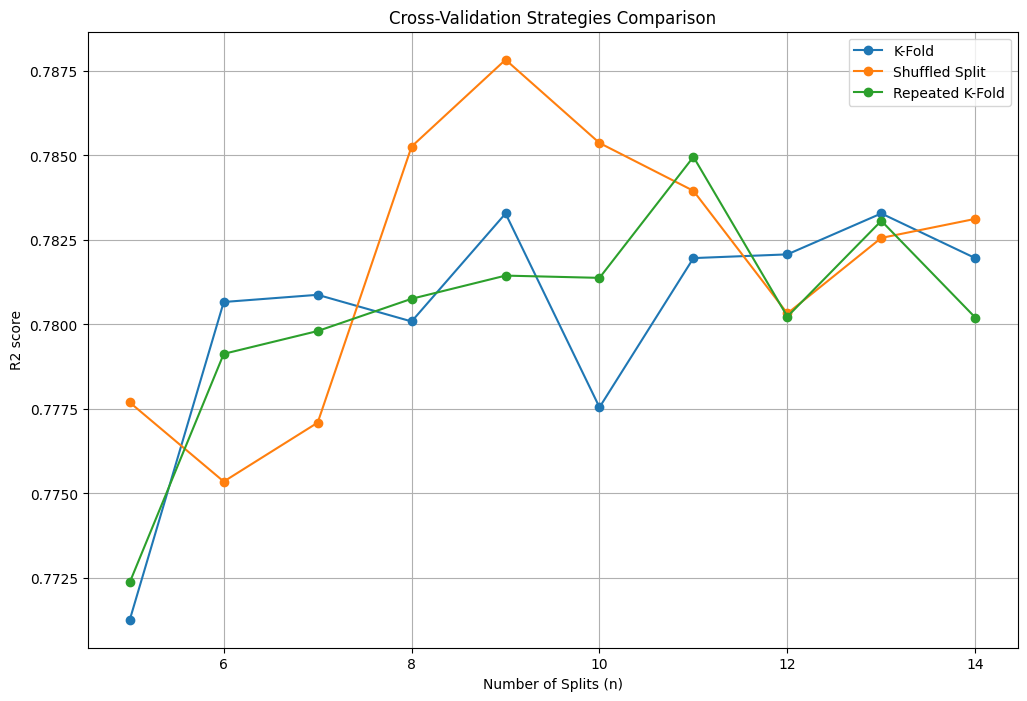

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, RepeatedKFold
import matplotlib.pyplot as plt

clf = DecisionTreeRegressor(random_state=42)
n_splits_values = np.arange(5, 15)
accuracy_repeated = []
accuracy_kfold = []
accuracy_shuffled = []

for n_splits in n_splits_values:
    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x3, y3, cv=kfold_cv, scoring='r2')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.15, random_state=42)
    scores = cross_val_score(clf, x3, y3, cv=shuffled_cv, scoring='r2')
    accuracy_shuffled.append(np.mean(scores))

    repeated_cv = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=42)
    scores = cross_val_score(clf, x3, y3, cv=repeated_cv, scoring='r2')
    accuracy_repeated.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')
plt.plot(n_splits_values, accuracy_repeated, label='Repeated K-Fold', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()

In [162]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

kf = KFold(n_splits=5,shuffle=True,random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2score = []
for train_index, test_index in kf.split(x3):
    X_train, X_test = x3.iloc[train_index], x3.iloc[test_index]
    y_train, y_test = y3.iloc[train_index], y3.iloc[test_index]

    regressor = DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train, y_train)

    y_test_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2score.append(r2)

mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2score)

mean_mae_scores3.append(mean_mae)
mean_mse_scores3.append(mean_mse)
mean_rmse_scores3.append(mean_r2)
mean_r2score3.append(mean_r2)

print("Mean MAE:", mean_mae)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)
print("Mean R2 Score:", mean_r2)

Mean MAE: 0.22586543381225965
Mean MSE: 0.09614967223664952
Mean RMSE: 0.3098303640106084
Mean R2 Score: 0.7712615717907173


# SVM

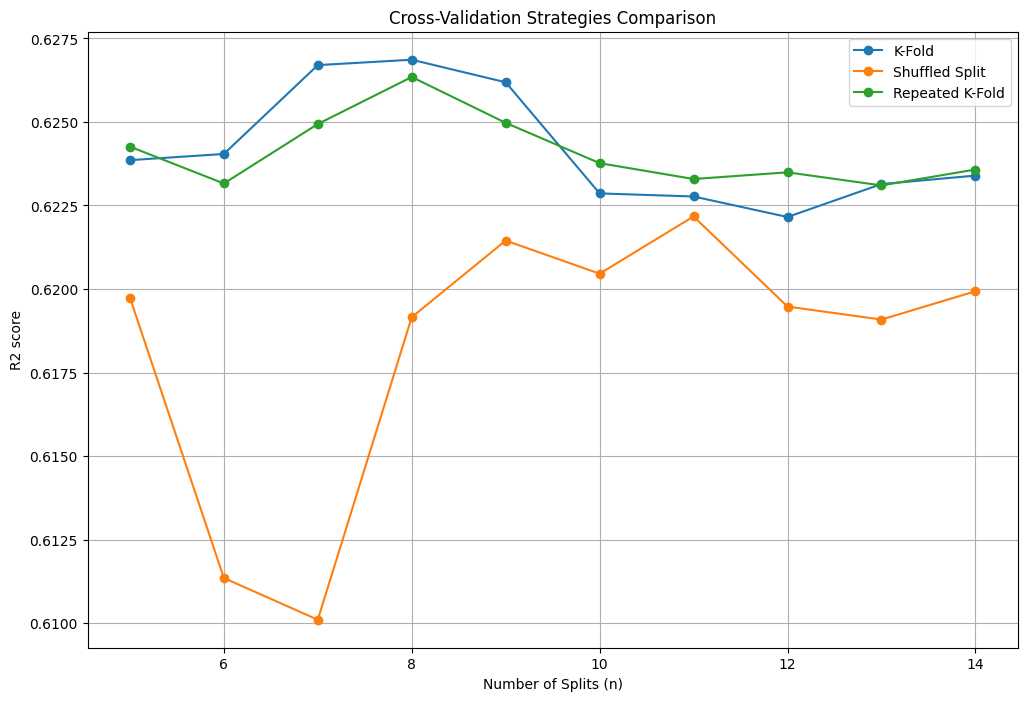

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit, RepeatedKFold
import matplotlib.pyplot as plt

clf = SVR(kernel='rbf',C=10,epsilon=0.1)
n_splits_values = np.arange(5, 15)
accuracy_repeated = []
accuracy_kfold = []
accuracy_shuffled = []

for n_splits in n_splits_values:
    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x3, y3, cv=kfold_cv, scoring='r2')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.15, random_state=42)
    scores = cross_val_score(clf, x3, y3, cv=shuffled_cv, scoring='r2')
    accuracy_shuffled.append(np.mean(scores))

    repeated_cv = RepeatedKFold(n_splits=n_splits, n_repeats=2, random_state=42)
    scores = cross_val_score(clf, x3, y3, cv=repeated_cv, scoring='r2')
    accuracy_repeated.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')
plt.plot(n_splits_values, accuracy_repeated, label='Repeated K-Fold', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('R2 score')
plt.legend()
plt.grid(True)
plt.show()

In [164]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have your features in X and labels in Y
kf = KFold(n_splits=5,shuffle=True,random_state=42)
mae_scores = []
mse_scores = []
rmse_scores = []
r2score = []
for train_index, test_index in kf.split(x3):
    X_train, X_test = x3.iloc[train_index], x3.iloc[test_index]
    y_train, y_test = y3.iloc[train_index], y3.iloc[test_index]

    regressor = SVR(kernel='rbf',C=10,epsilon=0.1)
    regressor.fit(X_train, y_train)

    y_test_pred = regressor.predict(X_test)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2score.append(r2)

mean_mae = np.mean(mae_scores)
mean_mse = np.mean(mse_scores)
mean_rmse = np.mean(rmse_scores)
mean_r2 = np.mean(r2score)

mean_mae_scores3.append(mean_mae)
mean_mse_scores3.append(mean_mse)
mean_rmse_scores3.append(mean_r2)
mean_r2score3.append(mean_r2)

print("Mean MAE:", mean_mae)
print("Mean MSE:", mean_mse)
print("Mean RMSE:", mean_rmse)
print("Mean R2 Score:", mean_r2)

Mean MAE: 0.3134397549536131
Mean MSE: 0.15775128100222213
Mean RMSE: 0.3968994403183074
Mean R2 Score: 0.623856158585933


In [165]:
models_Compare20 = [('LinearRegression', ds3lr_normal_mae, ds3lr_normal_mse, ds3lr_normal_rmse, ds3lr_normal),
    ('KNeighbors', ds3knn_mae, ds3knn_mse, ds3knn_rmse, ds3knn_r2),
    ('DecisionTree', ds3dt_mae, ds3dt_mse, ds3dt_rmse, ds3dt_r2),
    ('SVM', ds3svm_mae, ds3svm_mse, ds3svm_rmse, ds3svm_r2)]

predict_Compare20 = pd.DataFrame(data = models_Compare20, columns=['Model', 'mae','mse', 'rmse', 'R2_Score'])
predict_Compare20

,Model,mae,mse,rmse,R2_Score
0,LinearRegression,0.328202,0.185576,0.430785,0.559056
1,KNeighbors,0.228941,0.095969,0.309789,0.771969
2,DecisionTree,0.213600,0.084126,0.290046,0.800108
3,SVM,0.228534,0.102825,0.320663,0.755679


In [166]:
models_Compare21 = [('LinearRegression', mean_mae_scores3[0], mean_mse_scores3[0], mean_rmse_scores3[0],mean_r2score3[0]),
    ('KNeighbors', mean_mae_scores3[1],  mean_mse_scores3[1], mean_rmse_scores3[1],mean_r2score3[1]),
    ('DecisionTree',mean_mae_scores3[2],  mean_mse_scores3[2], mean_rmse_scores3[2],mean_r2score3[2]),
    ('SVM', mean_mae_scores3[3],  mean_mse_scores3[3], mean_rmse_scores3[3],mean_r2score3[3]),]

predict_Compare21 = pd.DataFrame(data = models_Compare21, columns=['Model', 'mae','mse', 'rmse', 'R2_Score'])
predict_Compare21

,Model,mae,mse,rmse,R2_Score
0,LinearRegression,0.320168,0.166246,0.603802,0.603802
1,KNeighbors,0.228972,0.095991,0.771778,0.771778
2,DecisionTree,0.225865,0.096150,0.771262,0.771262
3,SVM,0.313440,0.157751,0.623856,0.623856
